In [1]:
import warnings
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")

import os, sys, time
import numpy as np
import matplotlib.pyplot as plt
import skimage.io as sio
import skimage.transform as sm
import copy
import ou_noise

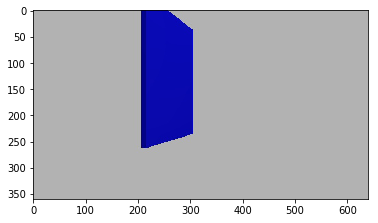

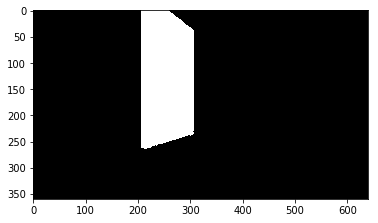

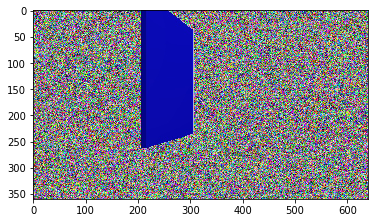

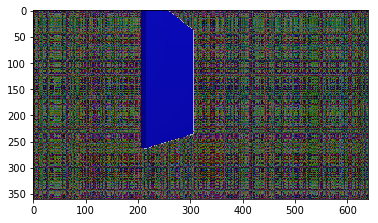

In [188]:
# 1. Load image 
root_dir='/esat/opal/kkelchte/docker_home/pilot_data'
mother_dir='tmp'
# name='poster'
for name in ['poster']:
# for name in ['blocked_hole','ceiling','doorway','floor','radiator']:
    img=sio.imread("{0}/{1}/{2}.jpg".format(root_dir,mother_dir,name))
    mask=np.zeros(img.shape) #initialize all negative
#     gray_min=177
#     gray_max=179
#     gray_min = 170
#     gray_max = 190
    gray_min=150
    gray_max=200

    # 2. mask
    start_time=time.time()
    gray_range=list(range(gray_min, gray_max))
    
    # loop over channels and if pixel of some layer is not within range
    # it should be let through
    mask_0=mask[:,:,0]
    mask_1=mask[:,:,1]
    mask_2=mask[:,:,2]
    
    img_0 = img[:,:,0]
    img_1 = img[:,:,1]
    img_2 = img[:,:,2]
    
    for mask_i in [mask_0, mask_1, mask_2]:
        for img_i in [img_0, img_1, img_2]:
            mask_i[img_i<gray_min]=1
            mask_i[img_i>gray_max]=1

    # 3. add uniform noise and combine
    background = np.random.randint(0,255+1,size=img.shape)
    inv_mask=np.abs(mask-1)
    combined=np.multiply(mask,img)+np.multiply(inv_mask,background)

    plt.imshow(img)
    plt.show()
    plt.imshow(mask)
    plt.show()
    plt.imsave("{0}/{1}/{2}_mask.jpg".format(root_dir, mother_dir,name),mask)

    plt.imshow(combined.astype(np.uint8))
    plt.show()
    plt.imsave("{0}/{1}/{2}_uni.jpg".format(root_dir, mother_dir,name),combined.astype(np.uint8))
    
    # 4. create horizontal noise over the columns repeated over the rows
    theta=np.random.beta(2,2) #min(max(np.random.normal(0.5,1),0),2)
    sigma=np.random.beta(1,3)
    ou = ou_noise.OUNoise(3,0,theta,sigma)
    horizontal_noise = []
    for i in range(img.shape[1]):
        horizontal_noise.append(np.asarray(256*ou.noise()+256/2.))

    horizontal_noise = np.repeat(np.expand_dims(np.asarray(horizontal_noise), axis=0),img.shape[0],axis=0).astype(np.uint8)

    # create vertical noise over the rows repeated over the columns
    ou = ou_noise.OUNoise(3,0,theta,sigma)
    vertical_noise = []
    for i in range(img.shape[0]):
        vertical_noise.append(np.asarray(256*ou.noise()+256/2.))

    vertical_noise = np.repeat(np.expand_dims(np.asarray(vertical_noise), axis=1),img.shape[1],axis=1).astype(np.uint8)

    # combine the two 
    background = (horizontal_noise + vertical_noise)/2.
    
    inv_mask=np.abs(mask-1)
    combined=np.multiply(mask,img)+np.multiply(inv_mask,background)
    
    plt.imshow(combined.astype(np.uint8))
    plt.show()
    plt.imsave("{0}/{1}/{2}_ou.jpg".format(root_dir, mother_dir,name),combined.astype(np.uint8))
    
    

In [9]:
img


array([[[178, 178, 178],
        [178, 178, 178],
        [178, 178, 178],
        ...,
        [178, 178, 178],
        [178, 178, 178],
        [178, 178, 178]],

       [[178, 178, 178],
        [178, 178, 178],
        [178, 178, 178],
        ...,
        [178, 178, 178],
        [178, 178, 178],
        [178, 178, 178]],

       [[178, 178, 178],
        [178, 178, 178],
        [178, 178, 178],
        ...,
        [178, 178, 178],
        [178, 178, 178],
        [178, 178, 178]],

       ...,

       [[178, 178, 178],
        [178, 178, 178],
        [178, 178, 178],
        ...,
        [178, 178, 178],
        [178, 178, 178],
        [178, 178, 178]],

       [[178, 178, 178],
        [178, 178, 178],
        [178, 178, 178],
        ...,
        [178, 178, 178],
        [178, 178, 178],
        [178, 178, 178]],

       [[178, 178, 178],
        [178, 178, 178],
        [178, 178, 178],
        ...,
        [178, 178, 178],
        [178, 178, 178],
        [178, 178, 178]]

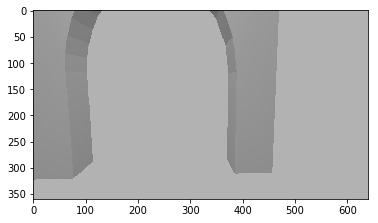

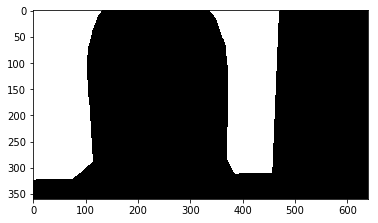

In [57]:
type(img[0,0,0])
type(mask[0,0,0])
plt.imshow(img)
plt.show()
plt.imshow(mask)
plt.show()



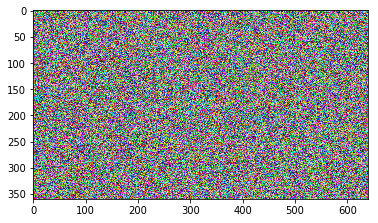

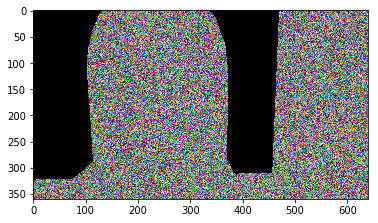

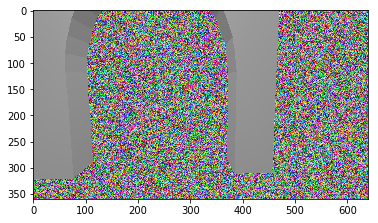

In [63]:
# 3. add uniform noise and combine
background = np.random.randint(0,255+1,size=img.shape)
inv_mask=np.abs(mask-1)
combined=np.multiply(mask,img)+np.multiply(inv_mask,background)
plt.imshow(background)
plt.show()
plt.imshow(np.multiply(background,inv_mask).astype(np.uint8))
plt.show()
plt.imshow(combined.astype(np.uint8))
plt.show()

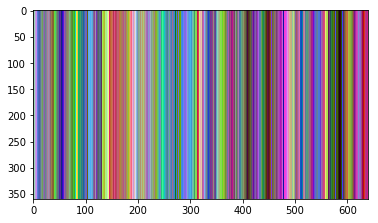

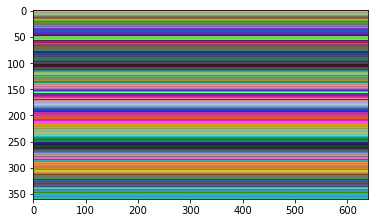

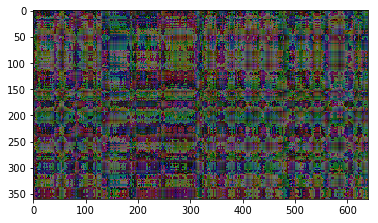

In [135]:
# 4. add OUNoise
import ou_noise
theta=0.1
sigma=0.1

# create horizontal noise over the columns repeated over the rows
ou = ou_noise.OUNoise(3,0,theta,sigma)
horizontal_noise = []
for i in range(img.shape[1]):
    horizontal_noise.append(np.asarray(256*ou.noise()+256/2.))

horizontal_noise = np.repeat(np.expand_dims(np.asarray(horizontal_noise), axis=0),img.shape[0],axis=0).astype(np.uint8)

# create vertical noise over the rows repeated over the columns
ou = ou_noise.OUNoise(3,0,theta,sigma)
vertical_noise = []
for i in range(img.shape[0]):
    vertical_noise.append(np.asarray(256*ou.noise()+256/2.))

vertical_noise = np.repeat(np.expand_dims(np.asarray(vertical_noise), axis=1),img.shape[1],axis=1).astype(np.uint8)

# combine the two 
combined_noise = (horizontal_noise + vertical_noise)/2.

plt.imshow(horizontal_noise)
plt.show()
plt.imshow(vertical_noise)
plt.show()
plt.imshow(combined_noise.astype(np.uint8))
plt.show()

plt.imsave("{0}/{1}/background_OU_horizontal.jpg".format(root_dir, mother_dir),horizontal_noise.astype(np.uint8))
plt.imsave("{0}/{1}/background_OU_vertical.jpg".format(root_dir, mother_dir),vertical_noise.astype(np.uint8))
plt.imsave("{0}/{1}/background_OU_combined.jpg".format(root_dir, mother_dir),combined_noise.astype(np.uint8))


